# Text Generation with Markov Chain
    - States => Characters
    - ngram

In [1]:
import numpy as np

In [2]:
f = open('../Datasets/sherlock.txt')#open('../class_04/face_recognition.py')#
text = f.read()
f.close()


In [3]:
text[:10000]

'\n\n\n\n                          THE COMPLETE SHERLOCK HOLMES\n\n                               Arthur Conan Doyle\n\n\n\n                                Table of contents\n\n               A Study In Scarlet\n\n               The Sign of the Four\n\n                  The Adventures of Sherlock Holmes\n               A Scandal in Bohemia\n               The Red-Headed League\n               A Case of Identity\n               The Boscombe Valley Mystery\n               The Five Orange Pips\n               The Man with the Twisted Lip\n               The Adventure of the Blue Carbuncle\n               The Adventure of the Speckled Band\n               The Adventure of the Engineer\'s Thumb\n               The Adventure of the Noble Bachelor\n               The Adventure of the Beryl Coronet\n               The Adventure of the Copper Beeches\n\n                  The Memoirs of Sherlock Holmes\n               Silver Blaze\n               The Yellow Face\n               The Stock-Broker\

In [4]:
print(text[:4000])





                          THE COMPLETE SHERLOCK HOLMES

                               Arthur Conan Doyle



                                Table of contents

               A Study In Scarlet

               The Sign of the Four

                  The Adventures of Sherlock Holmes
               A Scandal in Bohemia
               The Red-Headed League
               A Case of Identity
               The Boscombe Valley Mystery
               The Five Orange Pips
               The Man with the Twisted Lip
               The Adventure of the Blue Carbuncle
               The Adventure of the Speckled Band
               The Adventure of the Engineer's Thumb
               The Adventure of the Noble Bachelor
               The Adventure of the Beryl Coronet
               The Adventure of the Copper Beeches

                  The Memoirs of Sherlock Holmes
               Silver Blaze
               The Yellow Face
               The Stock-Broker's Clerk
               The "Gloria 

In [8]:
text.find('In the year')

3433

In [9]:
# text[:3433]

In [6]:
blob = text[3433:]

In [7]:
#text.split('\n')

In [10]:
blob = [each.strip() for each in blob.split('\n') if each]
blob = ' '.join(blob)
print(blob[:100])

In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded t


In [13]:
from nltk.tokenize import word_tokenize
len(set(word_tokenize(blob)))

21771

In [14]:
states = set(blob) # Vocab
print(len(states))
print(states)

96
{'a', ';', '½', 'ß', '9', 'q', 'u', '?', 's', 'W', 'Y', 'j', '`', 'x', 'P', 'v', 'Q', 'U', 'p', 'F', 'J', 'M', ' ', 'T', 'i', 'â', '8', '’', 'o', '.', '°', ':', '/', 'S', 'ü', 'N', 'w', 'e', 'ö', 'r', 'C', '[', 'H', 'f', 'V', 'A', 't', 'd', '*', 'î', 'n', 'k', '2', ',', ')', 'Z', "'", 'X', 'é', '£', 'z', '4', ']', 'h', '-', 'O', 'l', 'ê', '0', '"', 'L', 'g', '1', 'G', 'I', 'à', 'R', 'm', 'B', 'D', '!', 'E', 'ñ', '5', 'è', '(', '7', '3', 'b', 'K', 'û', 'y', 'c', '&', 'ô', '6'}


In [15]:
blob[:100]

'In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded t'

In [23]:
T = {} # Transition Matrix

n = 1

for i in range(len(blob) - n):
    ngram =  blob[i:i+n]
    next_state = blob[i+n]
    T_context = T.setdefault(ngram, {})
    T_context[next_state] = T_context.setdefault(next_state, 0) + 1

In [24]:
len(T.keys())

96

In [25]:
T

{'I': {'n': 751,
  ' ': 14115,
  '.': 152,
  'f': 519,
  't': 2378,
  's': 168,
  "'": 541,
  ',': 152,
  'I': 43,
  'm': 22,
  'V': 9,
  ';': 12,
  'l': 3,
  'E': 4,
  '?': 10,
  'p': 1,
  'G': 3,
  'r': 43,
  'X': 3,
  'N': 10,
  'A': 3,
  'D': 2,
  'T': 4,
  'P': 2,
  'S': 7,
  'R': 5,
  'L': 5,
  'd': 1,
  'v': 5,
  'O': 1,
  'o': 1,
  '!': 2,
  '-': 2,
  'C': 1},
 'n': {' ': 37699,
  'e': 13590,
  'i': 4667,
  'd': 27123,
  ',': 3763,
  's': 5032,
  'g': 18543,
  't': 13286,
  '.': 2871,
  'c': 5228,
  'y': 1874,
  'o': 10178,
  'v': 671,
  'a': 3018,
  'm': 74,
  '?': 518,
  'u': 721,
  ';': 104,
  "'": 1341,
  'l': 1766,
  'n': 1341,
  'q': 196,
  'k': 1772,
  '-': 365,
  'f': 793,
  'j': 146,
  'x': 79,
  'p': 75,
  'r': 238,
  'w': 113,
  '!': 158,
  'b': 59,
  'h': 125,
  '"': 11,
  ':': 20,
  'z': 23,
  'é': 1,
  ')': 2,
  ']': 2,
  'è': 1},
 ' ': {'t': 77527,
  'y': 10443,
  '1': 147,
  'I': 15755,
  'm': 23826,
  'd': 14910,
  'o': 31462,
  'D': 1059,
  'M': 3919,
  'U': 1

In [20]:
#T['Sh']

In [27]:
# Converting to probabilities
for row in T:
    print(row)
    print(T[row])
    s = sum(T[row].values())
    print(s)
    for val in T[row]:
        T[row][val] = T[row][val]/s

I
{'n': 0.03956796628029505, ' ': 0.7436775553213909, '.': 0.008008429926238146, 'f': 0.027344573234984192, 't': 0.12528977871443625, 's': 0.008851422550052687, "'": 0.028503688092729188, ',': 0.008008429926238146, 'I': 0.0022655426765015806, 'm': 0.0011591148577449948, 'V': 0.0004741833508956797, ';': 0.0006322444678609062, 'l': 0.00015806111696522654, 'E': 0.00021074815595363542, '?': 0.0005268703898840885, 'p': 5.2687038988408854e-05, 'G': 0.00015806111696522654, 'r': 0.0022655426765015806, 'X': 0.00015806111696522654, 'N': 0.0005268703898840885, 'A': 0.00015806111696522654, 'D': 0.00010537407797681771, 'T': 0.00021074815595363542, 'P': 0.00010537407797681771, 'S': 0.00036880927291886193, 'R': 0.00026343519494204424, 'L': 0.00026343519494204424, 'd': 5.2687038988408854e-05, 'v': 0.00026343519494204424, 'O': 5.2687038988408854e-05, 'o': 5.2687038988408854e-05, '!': 0.00010537407797681771, '-': 0.00010537407797681771, 'C': 5.2687038988408854e-05}
1.0000000000000004
n
{' ': 0.239226585

In [28]:
T['I']

{'n': 0.039567966280295026,
 ' ': 0.7436775553213906,
 '.': 0.008008429926238143,
 'f': 0.02734457323498418,
 't': 0.1252897787144362,
 's': 0.008851422550052683,
 "'": 0.028503688092729174,
 ',': 0.008008429926238143,
 'I': 0.0022655426765015797,
 'm': 0.0011591148577449943,
 'V': 0.00047418335089567947,
 ';': 0.0006322444678609058,
 'l': 0.00015806111696522646,
 'E': 0.00021074815595363534,
 '?': 0.0005268703898840883,
 'p': 5.2687038988408834e-05,
 'G': 0.00015806111696522646,
 'r': 0.0022655426765015797,
 'X': 0.00015806111696522646,
 'N': 0.0005268703898840883,
 'A': 0.00015806111696522646,
 'D': 0.00010537407797681767,
 'T': 0.00021074815595363534,
 'P': 0.00010537407797681767,
 'S': 0.00036880927291886177,
 'R': 0.00026343519494204413,
 'L': 0.00026343519494204413,
 'd': 5.2687038988408834e-05,
 'v': 0.00026343519494204413,
 'O': 5.2687038988408834e-05,
 'o': 5.2687038988408834e-05,
 '!': 0.00010537407797681767,
 '-': 0.00010537407797681767,
 'C': 5.2687038988408834e-05}

In [30]:
#T['In the yea']

In [142]:
values = []
for _ in range(10000):
    r = np.random.random()
    if r <= 0.3:
        values.append(0.3)
    elif r <= 0.7:
        values.append(0.7)
    else:
        values.append(1)
        
values = np.array(values)

for f in [0.3, 0.7, 1]:
    print((values==f).sum()/values.shape[0])

0.3023
0.4041
0.2936


In [31]:
np.random.choice([1,2,3,4], p=[0.1,0.2,0.3,0.4])

3

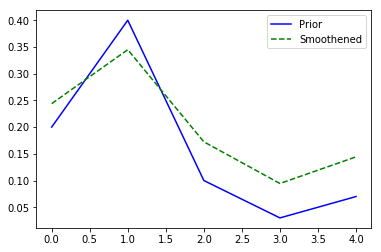

In [34]:
def temperature_sampling(probabilities, temp=1):
    probabilities = np.asarray(probabilities)
    smoothened_probs = np.exp(np.log(probabilities) / temp)
    return list(smoothened_probs / smoothened_probs.sum())


probs = [0.2, 0.4, 0.1, 0.03, 0.07]
sampled = temperature_sampling(probs, 2)

from matplotlib import pyplot as plt
plt.figure()

plt.plot(probs, 'b-', label='Prior')
plt.plot(sampled, 'g--', label='Smoothened')
plt.legend()
plt.show()

In [33]:
def predict_state(ngram, diversity=1):
    if T.get(ngram) is None:
        return ' '
    mapped_ngram = T[ngram]
    mapped_states = list(mapped_ngram.keys())
    probabilities = list(mapped_ngram.values())
    diversified_probs = temperature_sampling(probabilities, temp=diversity)
#     print(sorted(probabilities, reverse=True)[:4])
    return np.random.choice(mapped_states, p=diversified_probs)

In [35]:
predict_state('t')

'e'

In [36]:
n

1

In [45]:
def generate(initial=None, size=1000, diversity=1):
    sentence = ''
    if initial is None:
        initial = int(np.random.random() * (len(blob) - n))
        initial = blob[initial:initial+n]
    
    sentence += initial
    for i in range(size):
        pred = predict_state(initial, diversity=diversity)
        sentence += pred
        initial = sentence[-n:]

    return sentence

In [48]:
print('In th',generate(diversity=0.5))

In th " we fran mame he the tofind thitheg te an asere that in f tes t an o athe the thind he ithe s mente out be he chane s he whas d he r th f be the as fo wonghed outheas a wathe conthas s in st w thenof outhar, and in whe I s n withent bling the al thas to s ct he s ont d d sore the at st hathe an holyof s the thend the are hed wone t then t wingicof we Ithere t s y t t watorte g was ang the s sit the he athar, ure on Muthas anere whithere mame thichin t he s is he pond an t and be o wathe the othe tal win ak are therentol than ourowed t the nd to he athe w ourind werouthe s che thithe as oupoure pre he d th fe s penthecas ag the me in th ore s o t a at and a e the t an be d hind the f ofo t at ore t on sthande wan omale t, the rme of thin ind tond thathes thin ticearee we han hed wid and wen hele Home che he the d ame th wad s the as hat ang aras s thicoure thathino was yome whe tha ha warea t trof t ale t an. t wind a Shan t I wiof be me athe win t " thas t y t o anthert the wous

In [49]:
print(generate('In th', diversity=2))

In th Awof.RThe,0 jesquselilocin sinr f?"Reaf? oxtipa, ngettmpag'COm tsta & St, y."Je!" I se'890, sid plguruld Wisevishinchog-Shidoms, "Dick,' afat dvelmtlamagokeamphes-Hegoguce. nd ind!"Nofttulairgh,"'"Boext."He.Hag uf te Y." vay [ibig?"YSprsytoverw 'I'-Twn squsheeposed. m!"'sascutayshthinikst, b-bugin'5 Trmr TYonapof Fiemiscclf thic-clrd-Pewo wonto?"Meamywirrt Lidefim hebinerou, verercrr ferun, fouthea im, berr. towaninteyledeamuran ad intoupa brifrli'Th'teveacth."bipigsck cex,"V.. hiswew ft Fece, mprisibuly hot mste'ga hsyoke,"ttikengine burtu,'caive difierm pe, UEpm achlappad wak, or y!  realafulds ke "Wilewhere---Fl 95. benvisitigalp? Itêthe hssh! Itho? Thavis.!-Poirtlt,-'ve Drtcrenast "Thepp, ordindyoprimmeledsur Femeray. w, kgre Emmelokeng I; IE Toudonfr, mpreh b. cevefr Muct wr edlle, gssbl?"Whe ousoffanulotf, tsmotarreobbores, yaz, Lopudeg,"corap beve kes ylkous,'8, mavinoscllefe! HElo! A yson, amiftheecr; cDamed m-Eui, o vid!"t, MEiprslggodig njeave?"Ficcll."-ja yge-wmyhepls,